In [1]:
import numpy as np
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import keras

In [2]:
import matplotlib.pyplot as plt

In [3]:
Train_path = './Dataset/Train/'
Test_path = './Dataset/Test/'

In [4]:
!unzip Dataset.zip

Archive:  Dataset.zip
   creating: Dataset/Test/
   creating: Dataset/Test/Parasite/
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_10.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_11.png  
  inflating: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_12.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_13.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_14.png  
  inflating: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_15.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_16.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_17.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_18.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_19.png  
 extracting: Dataset/Test

In [5]:
train_datagen = image.ImageDataGenerator(
    rescale = 1.0/255,
    zoom_range = 0.2,
    horizontal_flip = True,
    shear_range = 0.2
)

test_datagen = image.ImageDataGenerator(
    rescale=1.0/255
)

In [6]:
train_generator = train_datagen.flow_from_directory(
    Train_path,
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = 32
)


Found 416 images belonging to 2 classes.


In [7]:
test_generator = test_datagen.flow_from_directory(
    Test_path,
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = 32
)

Found 134 images belonging to 2 classes.


In [8]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      9280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
hist = model.fit_generator(train_generator,epochs=10,steps_per_epoch=len(train_generator),validation_data=test_generator,validation_steps=len(test_generator))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
13/13 [==============================] - 5s 389ms/step - loss: 0.8332 - accuracy: 0.4760 - val_loss: 0.6920 - val_accuracy: 0.6791
Epoch 2/10
13/13 [==============================] - 5s 398ms/step - loss: 0.6926 - accuracy: 0.5264 - val_loss: 0.6883 - val_accuracy: 0.6791
Epoch 3/10
13/13 [==============================] - 5s 395ms/step - loss: 0.6677 - accuracy: 0.6851 - val_loss: 0.7991 - val_accuracy: 0.3209
Epoch 4/10
13/13 [==============================] - 5s 395ms/step - loss: 0.5561 - accuracy: 0.7139 - val_loss: 0.8955 - val_accuracy: 0.2537
Epoch 5/10
13/13 [==============================] - 5s 399ms/step - loss: 0.4496 - accuracy: 0.7812 - val_loss: 0.6940 - val_accuracy: 0.5149
Epoch 6/10
13/13 [==============================] - 5s 396ms/step - loss: 0.3500 - accuracy: 0.8534 - val_loss: 0.3726 - val_accuracy: 0.8507
Epoch 7/10
13/13 [==============================] - 5s 392ms/step - loss

In [11]:
model.predict_classes(test_generator)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1])

In [12]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

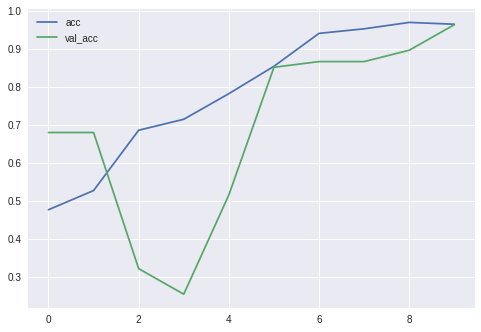

In [13]:
plt.style.use('seaborn')
plt.plot(acc,label='acc')
plt.plot(val_acc,label='val_acc')
plt.legend()
plt.show()

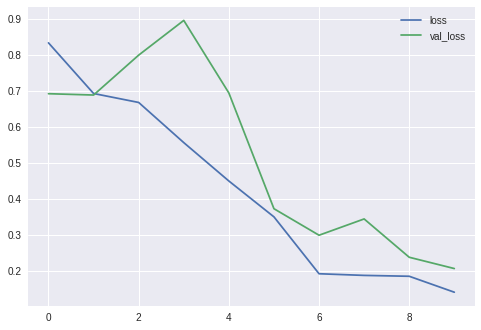

In [14]:
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')
plt.legend()
plt.show()

In [15]:
img = image.load_img('./Dataset/Test/Uninfected/C3thin_original_IMG_20150608_162922_cell_145.png',target_size=(224,224,3))
img = image.img_to_array(img)

In [16]:
img = img/255

In [17]:
img = np.expand_dims(img,axis=0)
img.shape

(1, 224, 224, 3)

In [19]:
model.predict_classes(img)

array([1])